In [19]:
from Crypto.Util.number import getPrime, isPrime
import random
import time
import statistics
import matplotlib.pyplot as plt



In [13]:
def generate_weak_prime(bitlength, n):
    order = n
    q_bits = bitlength - order.bit_length()
    while True:
        q = getPrime(q_bits)
        p = order * q + 1
        if isPrime(p):
            print(f"weak prime p: {p}")
            return p, order
    

def find_generator_order(g, p):
    value = 1
    for n in range(1, p):
        value = (value * g) % p
        if value == 1:
            print(f"generator order: {n}")
            return n
    return None


def generate_weak_generator(p, order):
    while True:
        i = random.randint(2, p - 2)
        g = pow(i, (p - 1) // order, p)
        if g != 1:
            print(f"weak generator g: {g}")
            return g
        

In [ ]:
#diffie-hellman key exchange attack
p, order = generate_weak_prime(2048, 16)
g = generate_weak_generator(p, order)

a = random.getrandbits(256)
b = random.getrandbits(256)

#public keys
a_public_key = pow(g, a, p)
b_public_key = pow(g, b, p)

#shared secret key
a_secret_key = pow(b_public_key, a, p)
b_secret_key = pow(a_public_key, b, p)

#brute force attack
n = find_generator_order(g, p)
table = {pow(g, x, p): x for x in range(n)}
a_mod = table[a_public_key]
b_mod = table[b_public_key]
print(f"attacker found a mod {n}: {a_mod}")
print(f"attacker found b mod {n}: {b_mod}")

#calculate shared secret key
attacker_key = pow(g, (a_mod * b_mod) % n, p)
print(f"attacker computed shared secret key: {attacker_key}")
if attacker_key == a_secret_key:
    print("attacker successfully computed the shared secret key")
else:
    print("attacker failed to compute the shared secret key")

graph of brute force attack against sub group

weak generator g: 10489897637736809556
weak generator g: 17798440935612872285
weak generator g: 8213869933079824652
weak generator g: 7287460627414778710
weak generator g: 9911202290800124378
weak generator g: 13488895856742235945
weak generator g: 483137384651533932
weak generator g: 13948796959540969225
weak generator g: 10327891858764739875
weak generator g: 10152999081385466213


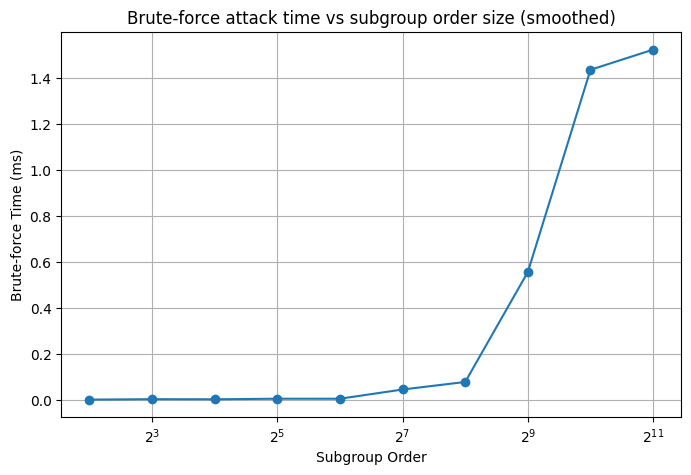

In [20]:
def brute_force_attack_time(order, repeats=30):
    # small stable prime
    p = getPrime(64)
    g = generate_weak_generator(p, order)

    # random private a
    a = random.randint(1, order - 1)
    A = pow(g, a, p)

    # warm up Python JIT / caches
    for _ in range(5):
        for x in range(order):
            if pow(g, x, p) == A:
                break

    # measure multiple times
    timings = []
    for _ in range(repeats):
        start = time.perf_counter()
        for x in range(order):
            if pow(g, x, p) == A:
                break
        end = time.perf_counter()
        timings.append(end - start)

    return statistics.median(timings)


# graph of brute force attack against sub group
orders = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

times = [brute_force_attack_time(n) for n in orders]

plt.figure(figsize=(8,5))
plt.plot(orders, [t*1000 for t in times], marker='o')
plt.xlabel("Subgroup Order")
plt.ylabel("Brute-force Time (ms)")
plt.title("Brute-force attack time vs subgroup order size (smoothed)")
plt.grid(True)
plt.xscale("log", base=2)
plt.show()


